In [200]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [201]:
df = pd.read_csv('diabetes.csv')

In [202]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [203]:
df.shape

(768, 9)

In [204]:
# getting statistical for all the statisticals

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


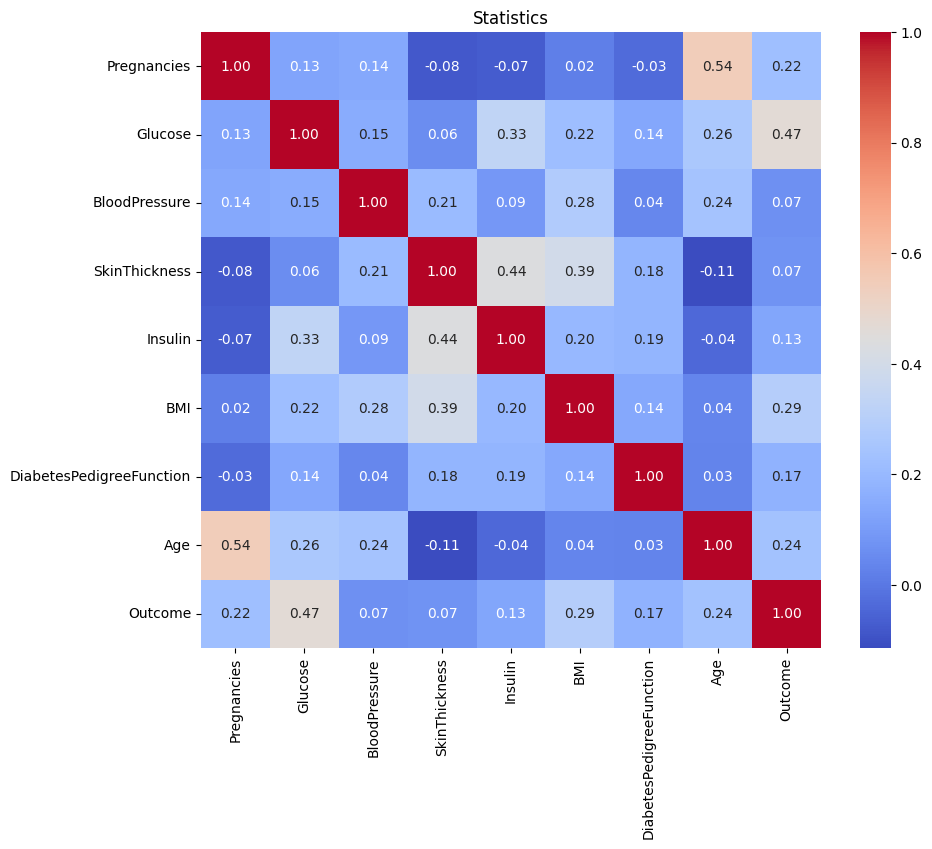

<Figure size 640x480 with 0 Axes>

In [232]:
# Correlation heatmap of features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Statistics')
plt.show()
plt.savefig('statistics.png', dpi = 300)

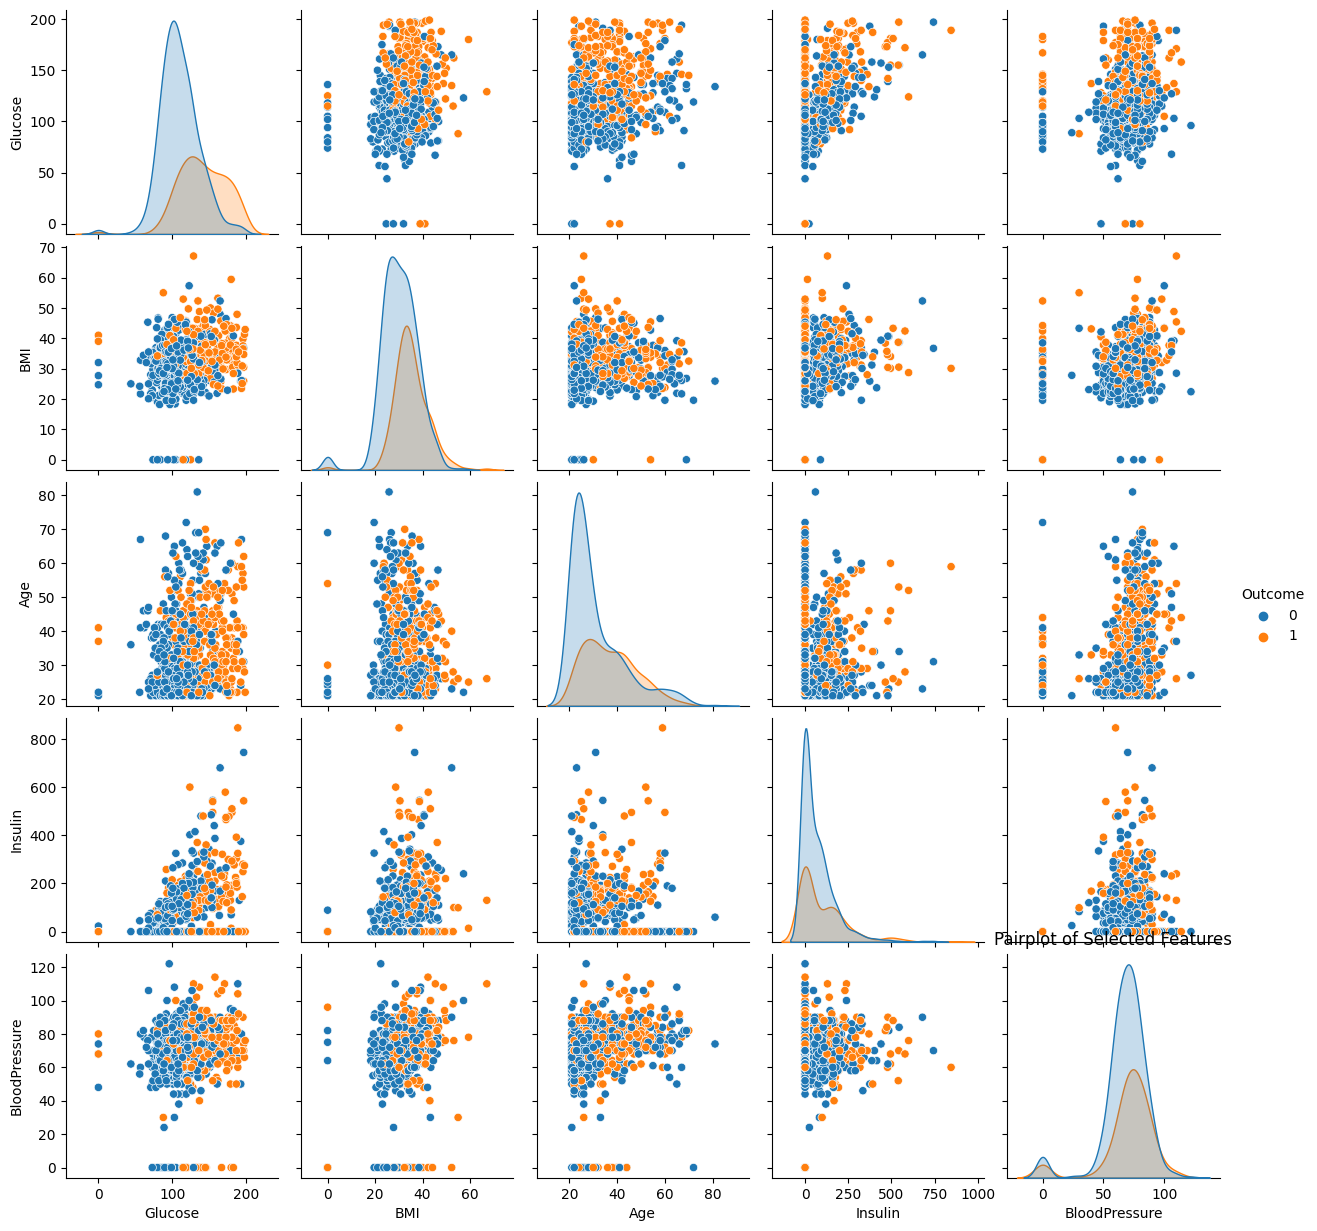

<Figure size 640x480 with 0 Axes>

In [234]:
# Pairplot
columns = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']
sns.pairplot(df[columns + ['Outcome']], hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Selected Features')
plt.show()
plt.savefig('lo.png',dpi= 300)

In [207]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [208]:
#  0 is label non diabetics person and 1 labels diabetics person

In [209]:
# groupby('Outcome'): This groups the DataFrame based on the unique values present in the 'Outcome' column. 
# It creates separate groups for each unique value in the 'Outcome' column.
# mean(): This calculates the mean of each numeric column for each group

df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [210]:
# NOW WE SEPERATING THE DATA LABELS 

x = df.drop(columns =  'Outcome' , axis =1 )
y= df['Outcome']

In [211]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [212]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [213]:
#    DATA STANDARDIZATION 

scaler = StandardScaler()

In [214]:
scaler.fit(x)

StandardScaler()

In [215]:
standardized_data = scaler.transform(x)

In [216]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [217]:
x = standardized_data
y = df['Outcome']

In [218]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [219]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [220]:
x_train , x_test ,y_train  , y_test = train_test_split(x,y, test_size = 0.2 , stratify = y , random_state = 2)

In [221]:
print(x.shape , x_train.shape , x_test.shape)

(768, 8) (614, 8) (154, 8)


In [222]:
# TRAINING MODEL 

In [223]:
classifier = svm.SVC(kernel = 'linear')

In [224]:
# TRAINING THE SUPPORT VECTOR MACHINE CLASSIFIER

classifier.fit(x_train , y_train)

SVC(kernel='linear')

In [225]:
# MODEL EVALUATION

In [226]:
# ACCURACY SCORE

In [227]:
x_train_accuracy = classifier.predict(x_train )
training_accuracy = accuracy_score (x_train_accuracy , y_train)

In [228]:
print('Accuracy score of the data : ', training_accuracy)

Accuracy score of the data :  0.7866449511400652


In [229]:
# MAKING PR4IDCITIVE SYSTEM 

In [230]:
input_data = (3,78,50,32,88,31,0.248,26) # THIS VALUE WE TAKE FROM TEH ROW 7  OF THE CSV FILE 

inputdata_np = np.asarray(input_data)

input_data_reshaped = inputdata_np.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

print(std_data)

[[-0.25095213 -1.34247638 -0.98770975  0.71908574  0.07120427 -0.12597727
  -0.676133   -0.61611067]]


C:\Users\91998\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [231]:
prediction = classifier.predict(std_data)

print(prediction)

if (prediction[0] == 0) :
    print('the persond doesnt have diabetics ')
else:
    print('the person has diabetics')


[0]
the persond doesnt have diabetics 
